In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
orders = pd.read_csv("./data/Orders.csv")
returns = pd.read_csv("./data/Returns.csv")

In [131]:
orders.head()
# returns.head()
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Seasons', 'Year'],
      dtype='object')

In [68]:
orders.describe()

,Row.ID,Postal.Code,Quantity,Discount,Shipping.Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [69]:
orders.Profit = list(map(lambda s: float(s.replace("$", "").replace(",", "")), orders.Profit))

In [70]:
orders.Sales = list(map(lambda s: float(s.replace("$", "").replace(",", "")), orders.Sales))

In [71]:
import datetime
orders["Order.Date"] = list(map(lambda x: (datetime.datetime.strptime(x, "%m/%d/%y")).date(), orders["Order.Date"]))

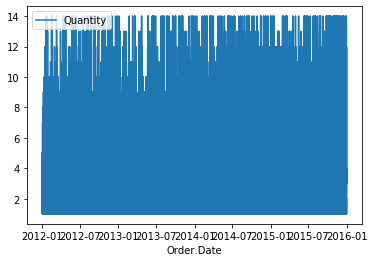

In [106]:
orders.plot(x="Order.Date", y="Quantity")

In [79]:
season_list = []
for date in orders["Order.Date"]:
    if date.month in [12, 1, 2]:
        season_list.append("Winter")
    elif date.month in [3, 4, 5]:
        season_list.append("Spring")
    elif date.month in [6, 7, 8]:
        season_list.append("Summer")
    else:
        season_list.append("Fall")
orders["Seasons"] = season_list

In [82]:
orders["Year"] = list(map(lambda x: x.year, orders["Order.Date"]))

Text(0.5, 1.0, 'Different Categories through the Seasons')

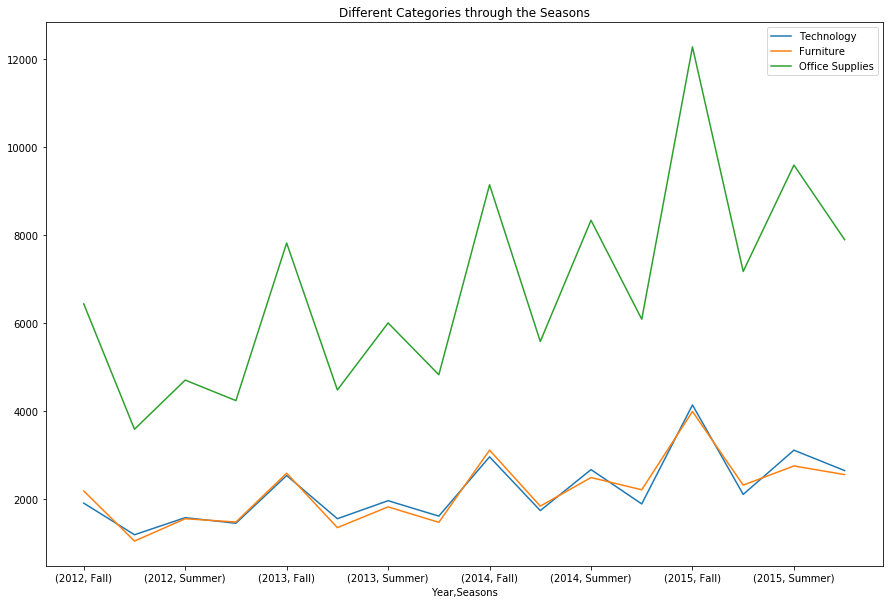

In [109]:
orders[orders.Category == orders.Category.unique()[0]].groupby(["Year", orders["Seasons"]])["Quantity"].sum(\
).plot(figsize=(15,10), label=orders.Category.unique()[0])
orders[orders.Category == orders.Category.unique()[1]].groupby(["Year", orders["Seasons"]])["Quantity"].sum(\
).plot(figsize=(15,10), label=orders.Category.unique()[1])
orders[orders.Category == orders.Category.unique()[2]].groupby(["Year", orders["Seasons"]])["Quantity"].sum(\
).plot(figsize=(15,10), label=orders.Category.unique()[2])
plt.legend(loc=1)
plt.title("Different Categories through the Seasons")

In [180]:
import math
returns
# orders.head()
return_losses = pd.merge(returns, orders, how = "right", left_on="Order ID", right_on="Order.ID")
# return_losses.loc[(return_losses["Profit"] < 0) & (return_losses.Returned == "Yes")]
# if this was actually looking for profit, I'd need to know total shipping costs to and from
return_losses.groupby(["Year", "Returned"])["Sales"].agg(sum)

Year  Returned
2012  Yes         111935.81
2013  Yes          96575.21
2014  Yes         133737.41
2015  Yes         183683.98
Name: Sales, dtype: float64

In [182]:
# orders.head()

In [181]:
# return_losses.loc[(return_losses["Profit"] < 0) & (return_losses.Returned == "Yes")]